<a href="https://colab.research.google.com/github/saulobw/PI-STEAM/blob/main/EDA_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
df= pd.read_csv('steam_arreglado.csv')
df.head()

,publisher,genres,title,tags,specs,price,early_access,id,developer,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140.0,Kotoshiro,2018.0
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0,643980.0,Secret Level SRL,2018.0
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0,670290.0,Poolians.com,2017.0
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0,767400.0,彼岸领域,2017.0
4,NaN,NaN,NaN,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,0,773570.0,NaN,0.0


In [24]:
#observacion de los valores faltantes
valores_nulos= df.isnull().sum()
print(valores_nulos)

publisher       8062
genres          3283
title           2050
tags             163
specs            670
price           1377
early_access       0
id                 2
developer       3299
release_year       0
dtype: int64


In [25]:
#eliminamos valores nulos
df = df.dropna()
df

,publisher,genres,title,tags,specs,price,early_access,id,developer,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0,761140.0,Kotoshiro,2018.0
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0,643980.0,Secret Level SRL,2018.0
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0,670290.0,Poolians.com,2017.0
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0,767400.0,彼岸领域,2017.0
5,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,"['Action', 'Adventure', 'Simulation', 'FPS', '...","['Single-player', 'Steam Achievements']",3.99,0,772540.0,Trickjump Games Ltd,2018.0
...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,"['Action', 'Indie', 'Casual', 'Violent', 'Adve...","['Single-player', 'Steam Achievements', 'Steam...",1.99,0,745400.0,Bidoniera Games,2018.0
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,"['Strategy', 'Indie', 'Casual', 'Simulation']","['Single-player', 'Steam Achievements']",1.99,0,773640.0,"Nikita ""Ghost_RUS""",2018.0
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,"['Strategy', 'Indie', 'Casual']","['Single-player', 'Steam Achievements', 'Steam...",4.99,0,733530.0,Sacada,2018.0
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,"['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",1.99,0,610660.0,Laush Dmitriy Sergeevich,2018.0


In [ ]:
import matplotlib.pyplot as plt

df = df['genres'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_counts = df['genre'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', title='Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
import re
#limpiamos columna developer
df_cleaned = df.dropna(subset=['developer'])
# Filtra caracteres no válidos y nombres muy cortos (menos de 3 caracteres)
df_cleaned = df_cleaned[df_cleaned['developer'].apply(lambda x: bool(re.match(r'^[a-zA-Z\s]{3,}$', x)))]

# Convierte los nombres de desarrolladores a minúsculas para eliminar duplicados de casos diferentes
df_cleaned['developer'] = df_cleaned['developer'].str.lower()

# Crea un nuevo DataFrame con los nombres de desarrolladores y sus frecuencias
developer_counts = df_cleaned['developer'].value_counts()
tabla_frecuencias = pd.DataFrame({'Desarrollador': developer_counts.index, 'Frecuencia': developer_counts.values})

# Filtra solo los nombres de desarrolladores más comunes (por ejemplo, los 50 más comunes)
top_developers = tabla_frecuencias.head(50)
print(top_developers)

                 Desarrollador  Frecuencia
0               dovetail games         253
1                       capcom         110
2   paradox development studio          97
3              stainless games          85
4                 dl softworks          78
5              choice of games          76
6                 scs software          73
7             arc system works          67
8                infinity ward          63
9                    rebellion          59
10                arcane raise          55
11                    treyarch          51
12                ronimo games          50
13               monster games          49
14                        sega          46
15                sonnori corp          42
16                nihon falcom          40
17               matrix trains          39
18                     tamsoft          39
19                idea factory          38
20          sports interactive          37
21                 nomad games          37
22         

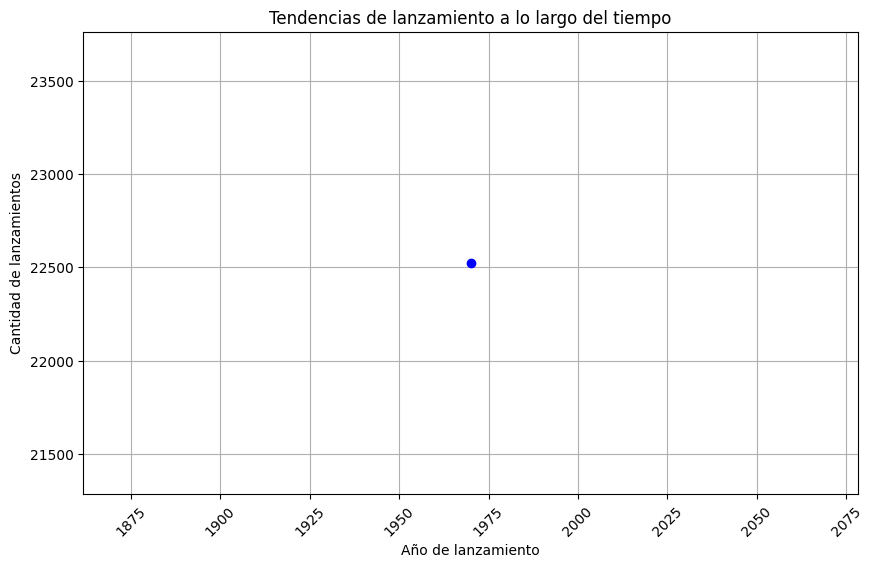

In [28]:
df = df.dropna(subset=['release_year'])

# Convierte la columna 'release_year' a formato de fecha, ignorando los valores "Soon.."
df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce')

# Elimina registros con fechas no válidas (por ejemplo, "Soon..")
df = df.dropna(subset=['release_year'])

# Extrae el año de lanzamiento de cada registro
df['year'] = df['release_year'].dt.year

# Cuenta la cantidad de lanzamientos por año
release_counts_by_year = df['year'].value_counts().sort_index()

# Visualiza los datos en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(release_counts_by_year.index, release_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de lanzamientos')
plt.title('Tendencias de lanzamiento a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


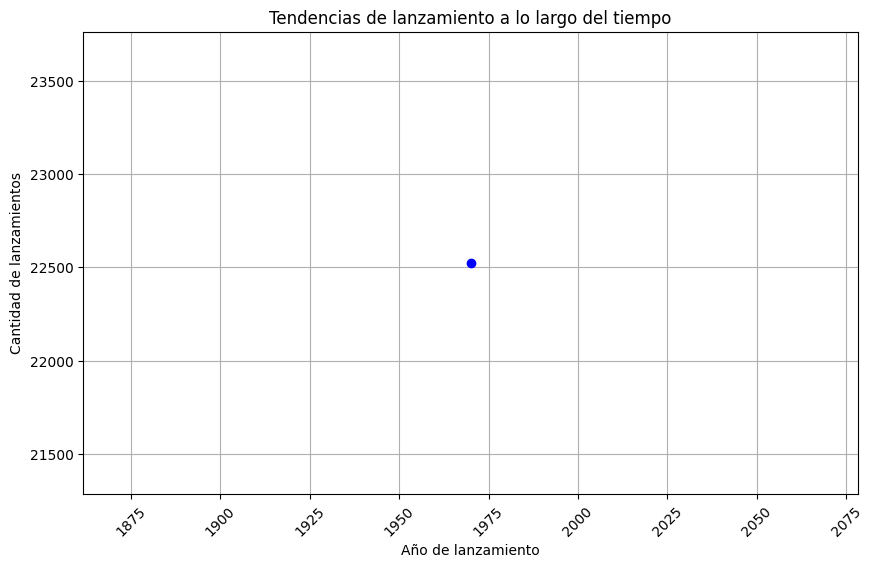

In [27]:
# Elimina los registros con valores no válidos en la columna "release_date"
df = df.dropna(subset=['release_year'])

# Convierte la columna "release_date" a formato de fecha, ignorando los valores "Soon.."
df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce')

# Elimina los registros con fechas no válidas (por ejemplo, "Soon..")
df = df.dropna(subset=['release_year'])

# Extrae el año de lanzamiento de cada registro
df['year'] = df['release_year'].dt.year

# Cuenta la cantidad de lanzamientos por año
release_counts_by_year = df['year'].value_counts().sort_index()

# Visualiza los datos en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(release_counts_by_year.index, release_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de lanzamientos')
plt.title('Tendencias de lanzamiento a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

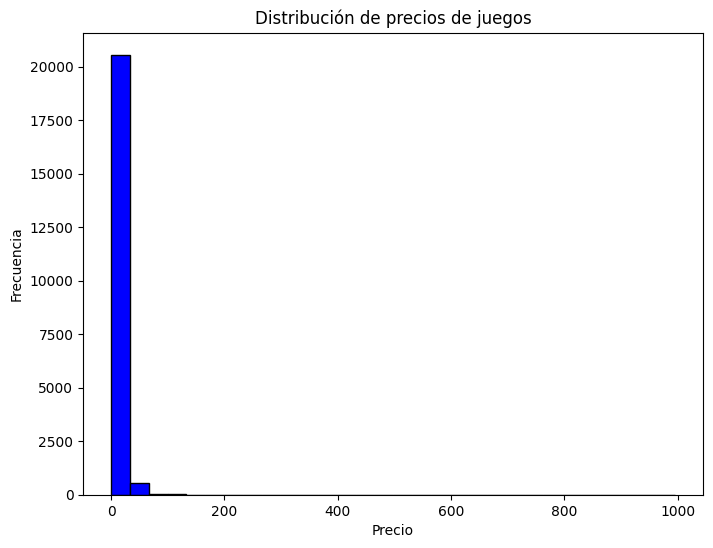

In [29]:
# Convertir la columna 'price' a valores numéricos
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Eliminar filas con valores no numéricos en la columna 'price'
df = df.dropna(subset=['price'])

# Histograma de precios
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de juegos')
plt.show()

In [30]:
# Filtrar las filas que no tienen valores faltantes en la columna 'tags'
df_filtered = df.dropna(subset=['tags'])

# Concatenar todas las listas de etiquetas en un solo conjunto
tags_set = set()
for tags_list in df_filtered['tags']:
    tags_set.update(tags_list)

# Calcular la frecuencia de cada etiqueta
tag_counts = {tag: sum(tag in tags_list for tags_list in df_filtered['tags']) for tag in tags_set}

# Crear un DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
tags_df = tags_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las etiquetas más comunes
print(tags_df.head(10))

   Tag  Frecuencia
67   ]       21218
61   '       21218
16   [       21218
28   n       19870
30   t       19822
53   i       19779
54           18344
50   ,       18320
44   e       18167
26   a       17677


In [ ]:
df_filtered = df.dropna(subset=['specs'])

# Concatenar todas las listas de especificaciones en un solo conjunto
specs_set = set()
for specs_list in df_filtered['specs']:
    specs_set.update(specs_list)

# Calcular la frecuencia de cada especificación
specs_counts = {spec: sum(spec in specs_list for specs_list in df_filtered['specs']) for spec in specs_set}

# Crear un DataFrame para mostrar los resultados
specs_df = pd.DataFrame(list(specs_counts.items()), columns=['Especificación', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
specs_df = specs_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las especificaciones más comunes
print(specs_df.head(10))

   Especificación  Frecuencia
6               '       28235
37              ]       28235
26              [       28235
24              e       28227
16              a       28220
0               l       28189
28              n       28179
15              i       27881
42              p       27731
38              r       27253
